In [332]:
using CSV, DataFrames, Dates
using CairoMakie
using Statistics
using StatsBase

# include("./src/eda.jl")

In [333]:
# function events_histogram(df, region)
 
#     set_theme!(Theme(fonts=(; regular="CMU Serif")))
#     fig = Figure(size = (700, 500), font= "CMU Serif",) ## probably you need to install this font in your system

#     ax = Axis(fig[1, 1], xlabel = L"M", ylabel = L"N", ylabelsize = 26,
#     xlabelsize = 22, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
#     xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10)

#     hist!(ax, df[:,:Magnitude], bins = 40, label = "number of events")

#     axislegend(ax, position = :rt, backgroundcolor = (:grey90, 0.25), labelsize=18);

#     save("./eda_results/$region/$(region)_histogram_events_magnitudes.png",fig, px_per_unit=5)
#     return fig
# end

In [355]:
region = "Japan"
df = CSV.read("./data/$region.csv", DataFrame)
mkpath("./eda_results/$(region)/")

"./eda_results/Japan"

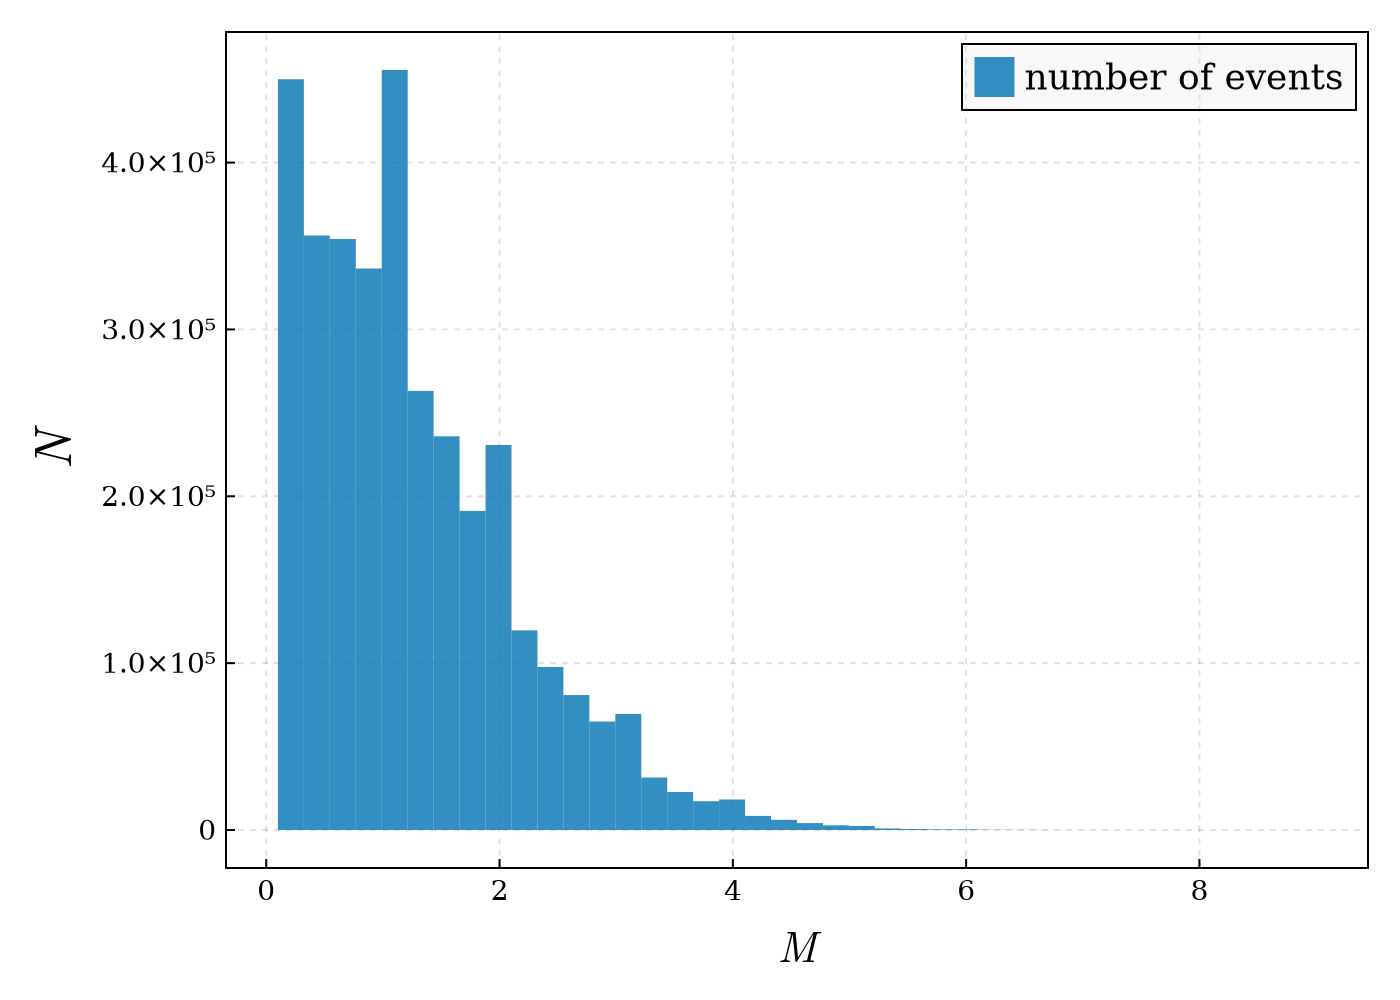

In [356]:
set_theme!(Theme(fonts=(; regular="CMU Serif")))
fig = Figure(size = (700, 500), font= "CMU Serif",) ## probably you need to install this font in your system

ax = Axis(fig[1, 1], xlabel = L"M", ylabel = L"N", ylabelsize = 26,
xlabelsize = 22, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10)

hist!(ax, df[:,:Magnitude], bins = 40, label = "number of events")

axislegend(ax, position = :rt, backgroundcolor = (:grey90, 0.25), labelsize=18);

# save("./eda_results/$region/$(region)_histogram_events_magnitudes.png",fig, px_per_unit=5)
return fig

In [357]:

magnitudes = df[:,:Magnitude]
h = fit(Histogram, magnitudes, nbins=40)

edges = collect(h.edges[1])
counts = h.weights



x_points = Float64[]
y_points = Float64[]

for i in 1:length(edges)-1
    if counts[i]!=0
        push!(x_points, (edges[i] + edges[i+1]) / 2)
        push!(y_points, counts[i])
    end  # Midpoint of each bin
end

In [382]:
df_trim = df[df.Magnitude .>= 1.0,:]
magnitudes = df_trim[:,:Magnitude]
# magnitudes = df[:,:Magnitude]
bin_width = 0.1

0.1

In [383]:
leng = length(magnitudes)
minim = minimum(magnitudes)
average = mean(magnitudes)
b_value = (1 / (average - (minim - (bin_width/2)))) * log(10, ℯ)
square_every_value = x -> x^2
b_stddev = sum(square_every_value.(magnitudes .- average)) / (leng * (leng - 1))
b_stddev = 2.3 * sqrt(b_stddev) * b_value^2
a_value = log10(leng) + b_value * minim

6.761467730068345

In [384]:
x = collect(range(minimum(magnitudes),maximum(magnitudes), 200))
y = 10 .^ (a_value .- b_value .* x);

In [385]:
a_value = round(a_value, digits=2)
b_value = round(b_value, digits=2)

0.48

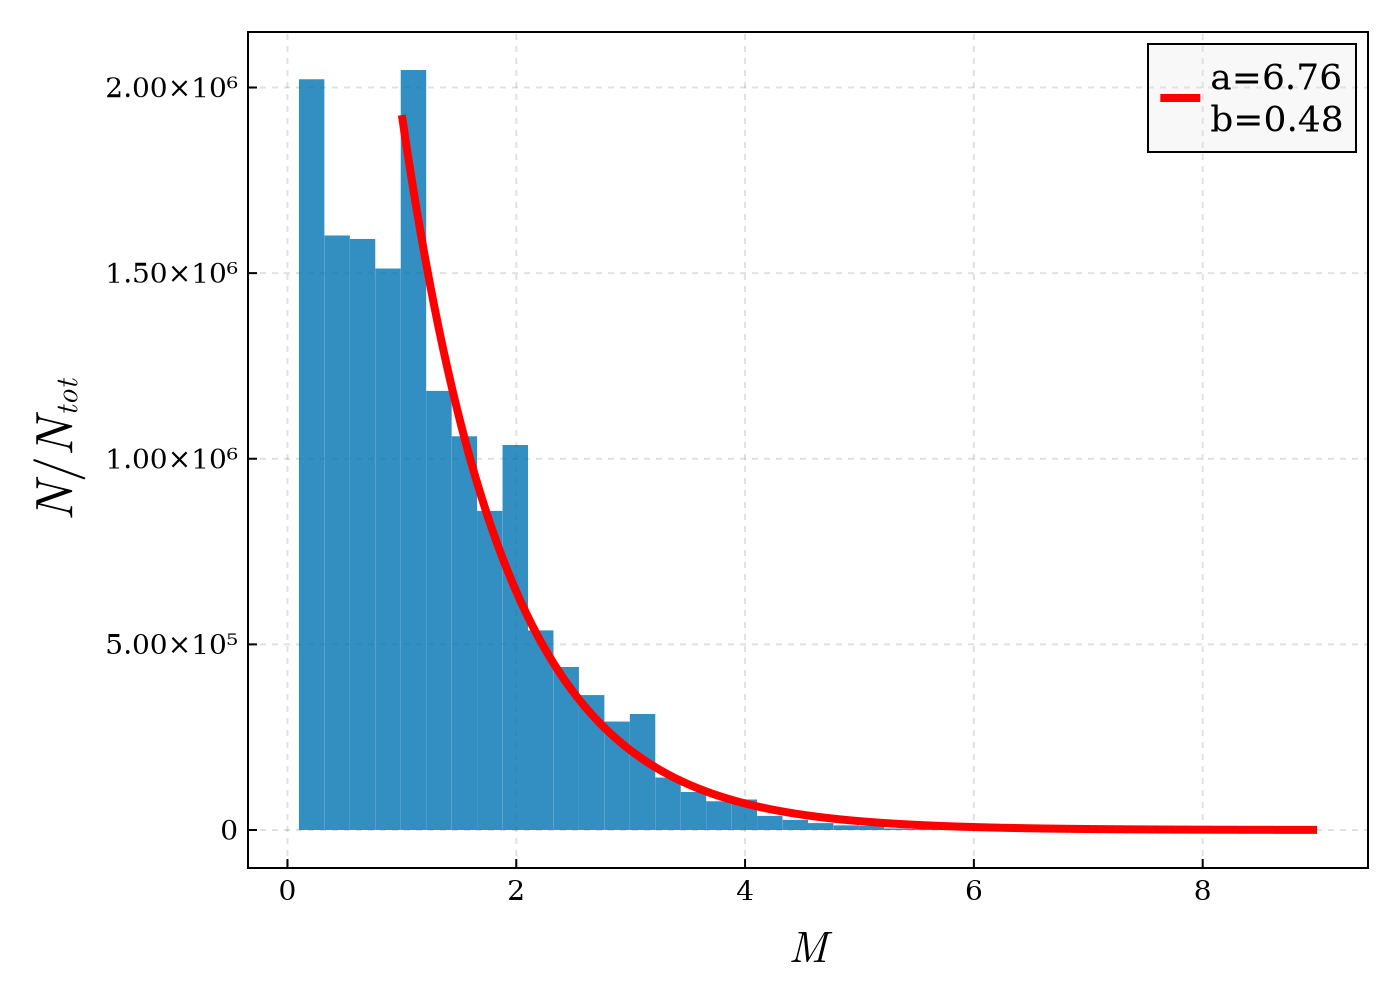

In [388]:
set_theme!(Theme(fonts=(; regular="CMU Serif")))
fig = Figure(size = (700, 500), font= "CMU Serif",) ## probably you need to install this font in your system

ax1 = Axis(fig[1, 1], xlabel = L"M", ylabel = L"N/N_{tot}", ylabelsize = 26, #yscale=log10, # xscale = log10,
xlabelsize = 22, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10)



# scatter!(ax1, x_points, y_points)
hist!(ax1, df[:,:Magnitude] , bins = 40, normalization=:density)

lines!(ax1, x, y, label="a=$(a_value)\nb=$(b_value)", color = :red, linewidth=4)

# hist!(ax1, df[:,:Magnitude] ./ (10 .^ a_value) , bins = 40, label = "number of events",)


# ax2 = Axis(fig[2, 1], xlabel = L"M", ylabel = L"N", ylabelsize = 26, #yscale=log10, # xscale = log10,
# xlabelsize = 22, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
# xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10)


# hist!(ax2, df[:,:Magnitude] , bins = 40, normalization=:pdf)

axislegend(ax1, position = :rt, backgroundcolor = (:grey90, 0.25), labelsize=18);

save("./eda_results/$region/$(region)_GR_histogram.png",fig, px_per_unit=5)
return fig